# **Problem Definition:**

### What is Fake News Detection?
* Identifying and classifying news as true or false.

* Uses NLP, machine learning, and fact-checking tools.

* Aims to curb the spread of misinformation online.

### Real-World Fake News Cases:

* 2016 U.S. Presidential Election

 *  False stories like “Pope endorses Donald Trump” went viral.
 * Spread via Facebook, influencing voter perceptions.

* COVID-19 Pandemic

  * Fake cures (e.g., drinking bleach) and vaccine misinformation circulated globally.
  * Led to health risks and vaccine hesitancy.

* Pizzagate Conspiracy (2016)

  * False claim that a pizzeria was a front for child trafficking linked to politicians.

  * Led a man to enter the restaurant with a gun.

* India-Pakistan Conflict (Pulwama Attack, 2019)

  * Fake videos and images circulated to inflame public sentiment.

  * Escalated tensions between nations.

### Aim of Fake News Detection System:
The aim of a fake news detection system is to accurately identify and filter false or misleading information spread across digital platforms. It helps prevent the harmful impact of misinformation on society, politics, and public health. By promoting credible content, it enhances trust in media and supports informed decision-making.

# **Data Collection:**

In [33]:
import pandas as pd

df = pd.read_csv('//Users/maulikraval/Desktop/Project/WELFake_Dataset.csv')
df.head(5)

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [34]:
df.tail(5)

,Unnamed: 0,title,text,label
72129,72129,Russians steal research on Trump in hack of U....,WASHINGTON (Reuters) - Hackers believed to be ...,0
72130,72130,WATCH: Giuliani Demands That Democrats Apolog...,"You know, because in fantasyland Republicans n...",1
72131,72131,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,0
72132,72132,Trump tussle gives unpopular Mexican leader mu...,MEXICO CITY (Reuters) - Donald Trump’s combati...,0
72133,72133,Goldman Sachs Endorses Hillary Clinton For Pre...,Goldman Sachs Endorses Hillary Clinton For Pre...,1


# **Data Preprocessing:**
1. Missing/Null Values removal
2. Text Cleaning(Lowercasing, Punctuation removal)
3. stop words removal
4. Tokenization
5. Lemmatization/Stemming
6. Handling Imbalance data

In [35]:
# Missing/Null Values removal

df.isna().sum()

Unnamed: 0      0
title         558
text           39
label           0
dtype: int64

In [36]:
df.dropna(inplace=True, ignore_index= True)
#df = df.drop(columns=['Unnamed: 0'])

df.isna().count()

Unnamed: 0    71537
title         71537
text          71537
label         71537
dtype: int64

### **Text Cleaning(Lowercasing, Punctuation removal):** 

In [37]:
# LowerCasing
for index in df.index:
    df.loc[index, 'text'] = df.loc[index, 'text'].lower() # Update 'text' column
    df.loc[index, 'title'] = df.loc[index, 'title'].lower() # Update 'title' column if it exists

df.head()

,Unnamed: 0,title,text,label
0,0,law enforcement on high alert following threat...,no comment is expected from barack obama membe...,1
1,2,unbelievable! obama’s attorney general says mo...,"now, most of the demonstrators gathered last ...",1
2,3,"bobby jindal, raised hindu, uses story of chri...",a dozen politically active pastors came here f...,0
3,4,satan 2: russia unvelis an image of its terrif...,"the rs-28 sarmat missile, dubbed satan 2, will...",1
4,5,about time! christian group sues amazon and sp...,all we can say on this one is it s about time ...,1


In [38]:
# Punctuation Removal
import string
columns_to_clean = ['text', 'title']  # Replace with your actual column names

# Function to remove punctuation
def remove_punctuation(text):
    if isinstance(text, str):
        return ''.join(char for char in text if char not in string.punctuation)
    return text

# Apply the function to the selected columns
for col in columns_to_clean:
    df[col] = df[col].apply(remove_punctuation)

df.head()

,Unnamed: 0,title,text,label
0,0,law enforcement on high alert following threat...,no comment is expected from barack obama membe...,1
1,2,unbelievable obama’s attorney general says mos...,now most of the demonstrators gathered last n...,1
2,3,bobby jindal raised hindu uses story of christ...,a dozen politically active pastors came here f...,0
3,4,satan 2 russia unvelis an image of its terrify...,the rs28 sarmat missile dubbed satan 2 will re...,1
4,5,about time christian group sues amazon and spl...,all we can say on this one is it s about time ...,1


### **Stop words removal:** 

In [39]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
import pandas as pd

# Define stopwords
stop_words = set(stopwords.words('english'))

# Example dataframe (replace with your actual dataframe)
# df = pd.read_csv('your_file.csv')

# Columns to clean
columns_to_clean = ['text', 'title']  # Replace with your actual column names

# Function to remove stopwords
def remove_stopwords_func(text):
    if isinstance(text, str):
        words = text.split()  # Simple split based on spaces (no punctuation handling)
        return ' '.join(word for word in words if word.lower() not in stop_words)
    return text

# Apply the function to the selected columns
for col in columns_to_clean:
    df[col] = df[col].apply(remove_stopwords_func)



# Show the first few rows
df

# Optionally, save the cleaned dataframe
# df.to_csv('cleaned_file.csv', index=False)


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/maulikraval/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Unnamed: 0,title,text,label
0,0,law enforcement high alert following threats c...,comment expected barack obama members fyf911 f...,1
1,2,unbelievable obama’s attorney general says cha...,demonstrators gathered last night exercising c...,1
2,3,bobby jindal raised hindu uses story christian...,dozen politically active pastors came private ...,0
3,4,satan 2 russia unvelis image terrifying new ‘s...,rs28 sarmat missile dubbed satan 2 replace ss1...,1
4,5,time christian group sues amazon splc designat...,say one time someone sued southern poverty law...,1
...,...,...,...,...
71532,72129,russians steal research trump hack us democrat...,washington reuters hackers believed working ru...,0
71533,72130,watch giuliani demands democrats apologize tru...,know fantasyland republicans never questioned ...,1
71534,72131,migrants refuse leave train refugee camp hungary,migrants refuse leave train refugee camp hunga...,0
71535,72132,trump tussle gives unpopular mexican leader mu...,mexico city reuters donald trump’s combative s...,0


### **Tokenization:** 

In [40]:
# Tokenize using NLTK
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

# Tokenize using basic split (safe and works without punkt)
for col in columns_to_clean:
    df[col + '_tokens'] = df[col].apply(lambda x: x.split() if isinstance(x, str) else [])
df.head()

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/maulikraval/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Unnamed: 0,title,text,label,text_tokens,title_tokens
0,0,law enforcement high alert following threats c...,comment expected barack obama members fyf911 f...,1,"[comment, expected, barack, obama, members, fy...","[law, enforcement, high, alert, following, thr..."
1,2,unbelievable obama’s attorney general says cha...,demonstrators gathered last night exercising c...,1,"[demonstrators, gathered, last, night, exercis...","[unbelievable, obama’s, attorney, general, say..."
2,3,bobby jindal raised hindu uses story christian...,dozen politically active pastors came private ...,0,"[dozen, politically, active, pastors, came, pr...","[bobby, jindal, raised, hindu, uses, story, ch..."
3,4,satan 2 russia unvelis image terrifying new ‘s...,rs28 sarmat missile dubbed satan 2 replace ss1...,1,"[rs28, sarmat, missile, dubbed, satan, 2, repl...","[satan, 2, russia, unvelis, image, terrifying,..."
4,5,time christian group sues amazon splc designat...,say one time someone sued southern poverty law...,1,"[say, one, time, someone, sued, southern, pove...","[time, christian, group, sues, amazon, splc, d..."


### **Lemmatization:** 

In [41]:
import nltk
nltk.download('punkt')

import pandas as pd
import nltk
from nltk.stem import WordNetLemmatizer

# Ensure you have the necessary NLTK data files
nltk.download('wordnet')

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Read the CSV file into a pandas DataFrame
#df = pd.read_csv('your_file.csv')

# Function to lemmatize the text (assuming it's already tokenized as a list)
def lemmatize_column(tokens):
    # Lemmatize each word in the list
    lemmatized_words = [lemmatizer.lemmatize(word) for word in tokens]
    # Return the lemmatized words as a string (or list, depending on your preference)
    return " ".join(lemmatized_words)  # or just return lemmatized_words if you prefer a list

# Apply lemmatization to both columns (assuming they contain lists of tokens)
df['text_tokens'] = df['text_tokens'].apply(lambda x: lemmatize_column(eval(x)) if isinstance(x, str) else lemmatize_column(x))
df['title_tokens'] = df['title_tokens'].apply(lambda x: lemmatize_column(eval(x)) if isinstance(x, str) else lemmatize_column(x))


# Save the DataFrame back to CSV
#df.to_csv('lemmatized_output.csv', index=False)

print("Lemmatization complete!")


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/maulikraval/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/maulikraval/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Lemmatization complete!


### **Handling Imbalance data:** 

label
1    36509
0    35028
Name: count, dtype: int64


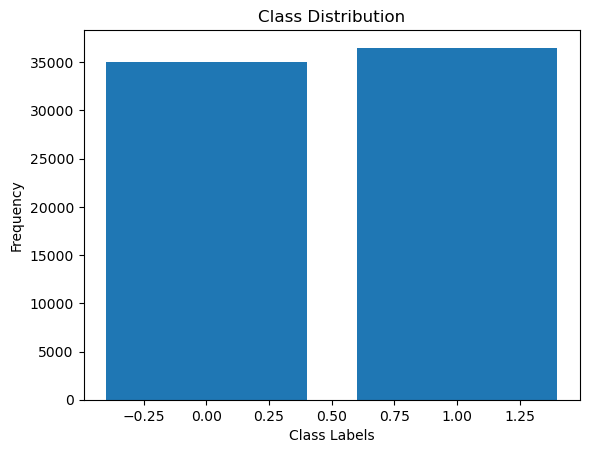

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Check the class distribution (target column)
class_distribution = df['label'].value_counts()

print(class_distribution)

plt.bar(class_distribution.index, class_distribution.values)
plt.xlabel('Class Labels')
plt.ylabel('Frequency')
plt.title('Class Distribution')
plt.show()


# **EDA:**

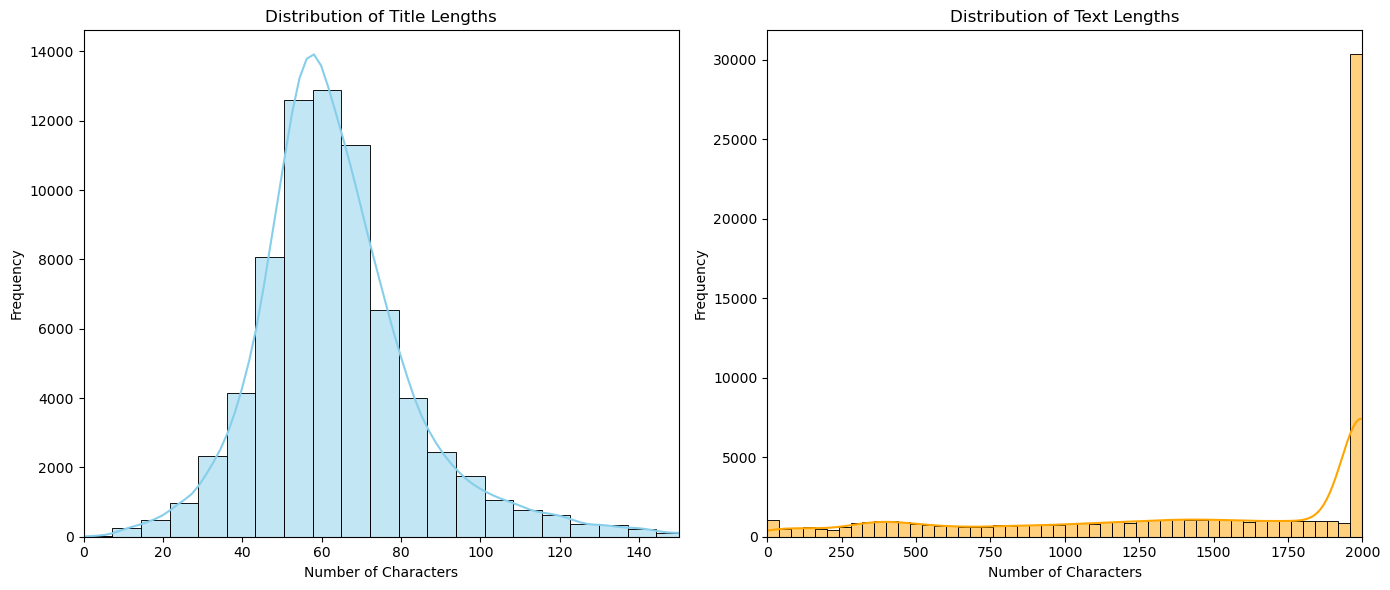

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create new columns for lengths
df['title_len'] = df['title'].apply(lambda x: len(x) if isinstance(x, str) else 0)
df['text_len'] = df['text'].apply(lambda x: len(x) if isinstance(x, str) else 0)

# Set up the figure
plt.figure(figsize=(14, 6))

# Title length histogram
plt.subplot(1, 2, 1)
sns.histplot(df['title_len'], kde=True, color='skyblue', bins=50)
plt.title('Distribution of Title Lengths')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.xlim(0, 150)  # appropriate for titles

# Text length histogram
plt.subplot(1, 2, 2)
# Optional: clip very long texts to avoid distortion
sns.histplot(df['text_len'].clip(upper=2000), kde=True, color='orange', bins=50)
plt.title('Distribution of Text Lengths')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.xlim(0, 2000)  # more suitable for full text

plt.tight_layout()
plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/maulikraval/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


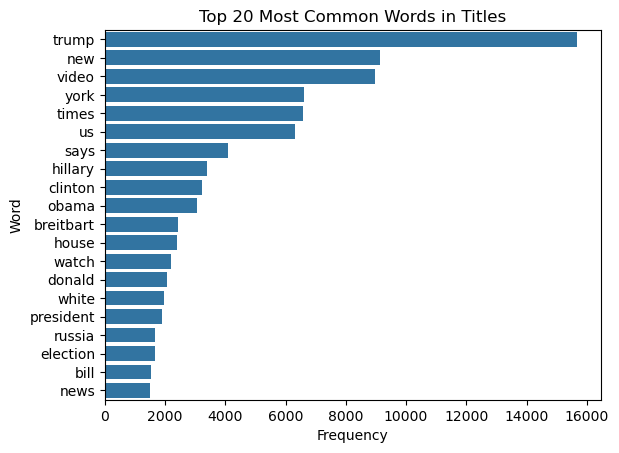

In [44]:
from collections import Counter
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

# Flatten and clean words
all_title_words = ' '.join(df['title'].dropna()).lower().split()
all_title_words = [word for word in all_title_words if word.isalpha() and word not in stop_words]

common_title_words = Counter(all_title_words).most_common(20)

# Plot
import pandas as pd
word_df = pd.DataFrame(common_title_words, columns=['word', 'count'])

sns.barplot(data=word_df, x='count', y='word')
plt.title("Top 20 Most Common Words in Titles")
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.show()


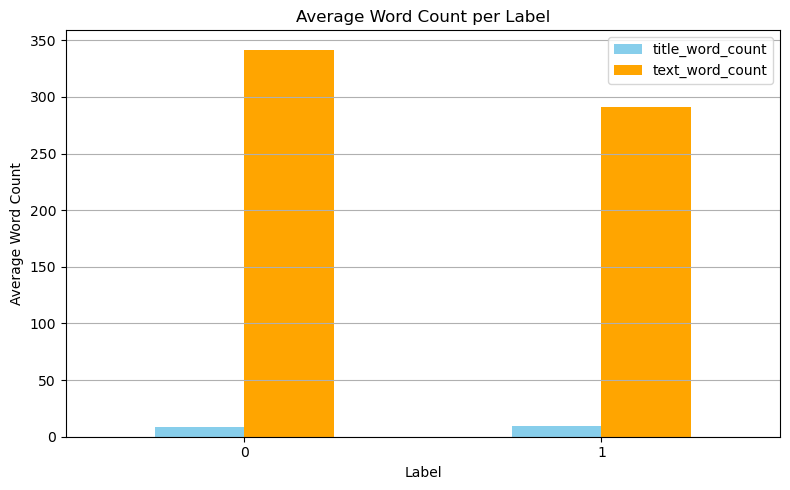

In [45]:
import matplotlib.pyplot as plt

# Create word count columns if they don't exist
df['title_word_count'] = df['title'].apply(lambda x: len(str(x).split()))
df['text_word_count'] = df['text'].apply(lambda x: len(str(x).split()))

# Group by label and calculate average word counts
df.groupby('label')[['title_word_count', 'text_word_count']].mean().plot(
    kind='bar',
    figsize=(8, 5),
    color=['skyblue', 'orange']
)

# Customize plot
plt.title("Average Word Count per Label")
plt.ylabel("Average Word Count")
plt.xlabel("Label")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [46]:
print(df.columns)

Index(['Unnamed: 0', 'title', 'text', 'label', 'text_tokens', 'title_tokens',
       'title_len', 'text_len', 'title_word_count', 'text_word_count'],
      dtype='object')


In [47]:
df = df[['text', 'title', 'text_tokens', 'title_tokens', 'label']]


In [48]:
df

,text,title,text_tokens,title_tokens,label
0,comment expected barack obama members fyf911 f...,law enforcement high alert following threats c...,comment expected barack obama member fyf911 fu...,law enforcement high alert following threat co...,1
1,demonstrators gathered last night exercising c...,unbelievable obama’s attorney general says cha...,demonstrator gathered last night exercising co...,unbelievable obama’s attorney general say char...,1
2,dozen politically active pastors came private ...,bobby jindal raised hindu uses story christian...,dozen politically active pastor came private d...,bobby jindal raised hindu us story christian c...,0
3,rs28 sarmat missile dubbed satan 2 replace ss1...,satan 2 russia unvelis image terrifying new ‘s...,rs28 sarmat missile dubbed satan 2 replace ss1...,satan 2 russia unvelis image terrifying new ‘s...,1
4,say one time someone sued southern poverty law...,time christian group sues amazon splc designat...,say one time someone sued southern poverty law...,time christian group sue amazon splc designati...,1
...,...,...,...,...,...
71532,washington reuters hackers believed working ru...,russians steal research trump hack us democrat...,washington reuters hacker believed working rus...,russian steal research trump hack u democratic...,0
71533,know fantasyland republicans never questioned ...,watch giuliani demands democrats apologize tru...,know fantasyland republican never questioned c...,watch giuliani demand democrat apologize trump...,1
71534,migrants refuse leave train refugee camp hunga...,migrants refuse leave train refugee camp hungary,migrant refuse leave train refugee camp hungar...,migrant refuse leave train refugee camp hungary,0
71535,mexico city reuters donald trump’s combative s...,trump tussle gives unpopular mexican leader mu...,mexico city reuters donald trump’s combative s...,trump tussle give unpopular mexican leader muc...,0


In [49]:
df.to_csv("fake_news_detection.csv")

# **Feature Engineering:**

In [50]:
df = pd.read_csv("/Users/maulikraval/Desktop/Project/fake_news_detection.csv")
print("Original dataset size:", len(df))  # should be ~72000
df


Original dataset size: 71537


,Unnamed: 0,text,title,text_tokens,title_tokens,label
0,0,comment expected barack obama members fyf911 f...,law enforcement high alert following threats c...,comment expected barack obama member fyf911 fu...,law enforcement high alert following threat co...,1
1,1,demonstrators gathered last night exercising c...,unbelievable obama’s attorney general says cha...,demonstrator gathered last night exercising co...,unbelievable obama’s attorney general say char...,1
2,2,dozen politically active pastors came private ...,bobby jindal raised hindu uses story christian...,dozen politically active pastor came private d...,bobby jindal raised hindu us story christian c...,0
3,3,rs28 sarmat missile dubbed satan 2 replace ss1...,satan 2 russia unvelis image terrifying new ‘s...,rs28 sarmat missile dubbed satan 2 replace ss1...,satan 2 russia unvelis image terrifying new ‘s...,1
4,4,say one time someone sued southern poverty law...,time christian group sues amazon splc designat...,say one time someone sued southern poverty law...,time christian group sue amazon splc designati...,1
...,...,...,...,...,...,...
71532,71532,washington reuters hackers believed working ru...,russians steal research trump hack us democrat...,washington reuters hacker believed working rus...,russian steal research trump hack u democratic...,0
71533,71533,know fantasyland republicans never questioned ...,watch giuliani demands democrats apologize tru...,know fantasyland republican never questioned c...,watch giuliani demand democrat apologize trump...,1
71534,71534,migrants refuse leave train refugee camp hunga...,migrants refuse leave train refugee camp hungary,migrant refuse leave train refugee camp hungar...,migrant refuse leave train refugee camp hungary,0
71535,71535,mexico city reuters donald trump’s combative s...,trump tussle gives unpopular mexican leader mu...,mexico city reuters donald trump’s combative s...,trump tussle give unpopular mexican leader muc...,0


In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Fill NaNs with empty string
df['text_tokens'] = df['text_tokens'].fillna('')
df['title_tokens'] = df['title_tokens'].fillna('')

# Initialize TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Transform both text and title columns
X_title_tfidf = vectorizer.fit_transform(df['title_tokens'])
X_text_tfidf = vectorizer.fit_transform(df['text_tokens'])

# Combine the features
from scipy.sparse import hstack
X_combined = hstack([X_title_tfidf, X_text_tfidf])

print("Feature shape:", X_combined.shape)

Feature shape: (71537, 391188)


# **Model Training**:
* Machine Learning:
    * Logistic Regression
    * NaiveBase
    * Random Forest

* Deep Learning Models:
    * LSTM
    * CNN for Text

In [52]:
X = X_combined # This is your final feature matrix
y = df['label']  # Replace with the actual name of your target column

### **Logistic Regression:**

In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)

Shape of X_test: (14308, 391188)
Shape of y_test: (14308,)
Shape of X_train: (57229, 391188)
Shape of y_train: (57229,)


In [54]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [55]:
from sklearn.metrics import accuracy_score

y_pred = lr_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9686888454011742


In [56]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      7081
           1       0.96      0.98      0.97      7227

    accuracy                           0.97     14308
   macro avg       0.97      0.97      0.97     14308
weighted avg       0.97      0.97      0.97     14308



In [57]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lr_model, X, y, cv=5)
print("Cross-val accuracy:", scores.mean())


Cross-val accuracy: 0.969190768768234


In [58]:
import pickle

# 1) Save the vectorizer
with open('vectorizer.pkl', 'wb') as vec_out:
    pickle.dump(vectorizer, vec_out)

# 2) Save the trained LR model
with open('lr_model.pkl', 'wb') as model_out:
    pickle.dump(lr_model, model_out)

print("✅ vectorizer.pkl and lr_model.pkl written to disk.")

✅ vectorizer.pkl and lr_model.pkl written to disk.


### **Naive Bayes:**

In [59]:
#Import necessary libraries
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer


# Initialize the Naive Bayes model
nb_model = MultinomialNB()

# Train the model
nb_model.fit(X_train, y_train)

# Make predictions
y_pred = nb_model.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Accuracy: 0.9075342465753424
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      7081
           1       0.92      0.89      0.91      7227

    accuracy                           0.91     14308
   macro avg       0.91      0.91      0.91     14308
weighted avg       0.91      0.91      0.91     14308



FOR NAIVEBASE MODEL SAVE:

In [60]:
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
import pandas as pd



# Fill NaNs
df['text_tokens'] = df['text_tokens'].fillna('')
df['title_tokens'] = df['title_tokens'].fillna('')

# Initialize and fit TF-IDF vectorizers
vectorizer_title = TfidfVectorizer()
vectorizer_text = TfidfVectorizer()

X_title_tfidf = vectorizer_title.fit_transform(df['title_tokens'])
X_text_tfidf = vectorizer_text.fit_transform(df['text_tokens'])

# Combine features
X_combined = hstack([X_title_tfidf, X_text_tfidf])

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_combined, df['label'], test_size=0.2, random_state=42
)

# Train model
from sklearn.naive_bayes import MultinomialNB
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Evaluate
y_pred = nb_model.predict(X_test)
from sklearn.metrics import accuracy_score, classification_report
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Save the model to fake_news_model.pkl
with open('fake_news_model.pkl', 'wb') as f:
    pickle.dump(nb_model, f)

# Save both vectorizers in a dictionary to vectorizer.pkl
vectorizers = {
    'title': vectorizer_title,
    'text': vectorizer_text
}

with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizers, f)

print("Model saved as fake_news_model.pkl")
print("Vectorizers saved as vectorizer.pkl")

# --- For web app usage ---
# Example of how to load and use in your web app:
"""
import pickle
from scipy.sparse import hstack

# Load the model and vectorizers
with open('fake_news_model.pkl', 'rb') as f:
    model = pickle.load(f)

with open('vectorizer.pkl', 'rb') as f:
    vecs = pickle.load(f)

# Prediction function for web app
def predict(title, text):
    title_vec = vecs['title'].transform([title])
    text_vec = vecs['text'].transform([text])
    combined = hstack([title_vec, text_vec])
    prediction = model.predict(combined)[0]
    return "Real" if prediction == 1 else "Fake"

# Example usage
result = predict("Breaking news", "This is some news content")
print(result)
"""

Accuracy: 0.9075342465753424
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      7081
           1       0.92      0.89      0.91      7227

    accuracy                           0.91     14308
   macro avg       0.91      0.91      0.91     14308
weighted avg       0.91      0.91      0.91     14308

Model saved as fake_news_model.pkl
Vectorizers saved as vectorizer.pkl


'\nimport pickle\nfrom scipy.sparse import hstack\n\n# Load the model and vectorizers\nwith open(\'fake_news_model.pkl\', \'rb\') as f:\n    model = pickle.load(f)\n\nwith open(\'vectorizer.pkl\', \'rb\') as f:\n    vecs = pickle.load(f)\n\n# Prediction function for web app\ndef predict(title, text):\n    title_vec = vecs[\'title\'].transform([title])\n    text_vec = vecs[\'text\'].transform([text])\n    combined = hstack([title_vec, text_vec])\n    prediction = model.predict(combined)[0]\n    return "Real" if prediction == 1 else "Fake"\n\n# Example usage\nresult = predict("Breaking news", "This is some news content")\nprint(result)\n'

### **Random Forest:**

In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split


#Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust the number of trees
rf_model.fit(X_train, y_train)

#Make predictions
y_pred = rf_model.predict(X_test)

#Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Random Forest Accuracy:", accuracy)
print("Classification Report:\n", report)


Random Forest Accuracy: 0.951425775789768
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95      7081
           1       0.95      0.95      0.95      7227

    accuracy                           0.95     14308
   macro avg       0.95      0.95      0.95     14308
weighted avg       0.95      0.95      0.95     14308



### **LTSM:**

Epoch 1/3


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


1789/1789 ━━━━━━━━━━━━━━━━━━━━ 39s 22ms/step - accuracy: 0.8592 - loss: 0.3216 - val_accuracy: 0.9504 - val_loss: 0.1383
Epoch 2/3
1789/1789 ━━━━━━━━━━━━━━━━━━━━ 39s 22ms/step - accuracy: 0.9614 - loss: 0.1100 - val_accuracy: 0.9560 - val_loss: 0.1226
Epoch 3/3
1789/1789 ━━━━━━━━━━━━━━━━━━━━ 39s 22ms/step - accuracy: 0.9773 - loss: 0.0689 - val_accuracy: 0.9593 - val_loss: 0.1209
448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9563 - loss: 0.1253
Test Accuracy: 0.9593


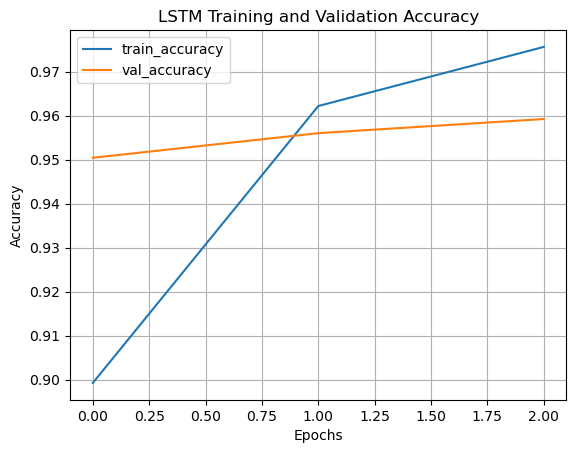

In [62]:
# Imports
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dropout, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Combine the text and title columns
df['combined_text'] = df['text_tokens'] + " " + df['title_tokens']

# Step 1: Preprocessing the text data
X = df['combined_text']
y = df['label']

# Tokenization
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(X)
X_sequences = tokenizer.texts_to_sequences(X)

# Pad the sequences
X_padded = pad_sequences(X_sequences, padding='post', maxlen=100)

# Encode the labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_onehot = to_categorical(y_encoded)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_padded, y_onehot, test_size=0.2, random_state=42)

# Step 4: Building the LSTM Model
lstm_model = Sequential()
lstm_model.add(Embedding(input_dim=5000, output_dim=128, input_length=100))
lstm_model.add(LSTM(64, return_sequences=False))
lstm_model.add(Dropout(0.5))
lstm_model.add(Dense(2, activation='softmax'))  # Use 'softmax' for multi-class, 'sigmoid' for binary (with 1 unit)

# Step 5: Compile the model
lstm_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 6: Train the model
lstm_history = lstm_model.fit(X_train, y_train, epochs=3, batch_size=32, validation_data=(X_test, y_test))

# Step 7: Evaluate the model
loss, accuracy = lstm_model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

# Step 8: Plot training history
plt.plot(lstm_history.history['accuracy'], label='train_accuracy')
plt.plot(lstm_history.history['val_accuracy'], label='val_accuracy')
plt.title('LSTM Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


### **CNN:**

Epoch 1/3


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


1789/1789 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8620 - loss: 0.2995 - val_accuracy: 0.9487 - val_loss: 0.1325
Epoch 2/3
1789/1789 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9623 - loss: 0.1052 - val_accuracy: 0.9501 - val_loss: 0.1322
Epoch 3/3
1789/1789 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9775 - loss: 0.0624 - val_accuracy: 0.9554 - val_loss: 0.1252
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9541 - loss: 0.1323
Test Accuracy: 0.955409586429596


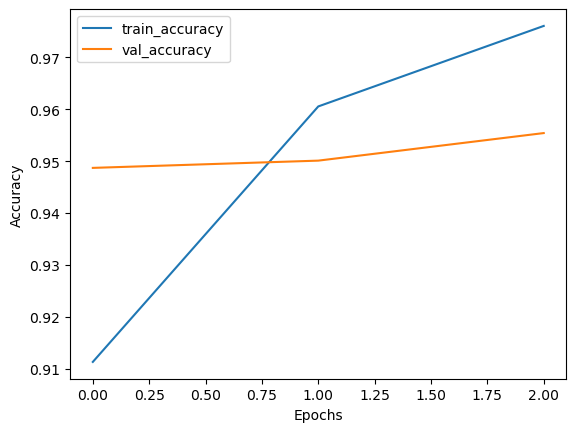

In [63]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Step 1: Preprocessing the text data
# Assuming 'combined_text' is the column containing combined text data (text + title)
X = df['combined_text']  # This is your final combined text
y = df['label']  # Target variable

# Tokenization
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(X)  # Now we tokenize the combined text

# Convert text to sequences
X_sequences = tokenizer.texts_to_sequences(X)

# Pad the sequences to ensure uniform length
X_padded = pad_sequences(X_sequences, padding='post', maxlen=100)  # Adjust maxlen as needed

# Step 2: Encoding the labels (target variable)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_onehot = to_categorical(y_encoded)  # For multi-class classification

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_padded, y_onehot, test_size=0.2, random_state=42)

# Step 4: Building the CNN Model

cnn_model = Sequential()

# Embedding layer (use pre-trained embeddings like GloVe or Word2Vec if needed)
cnn_model.add(Embedding(input_dim=5000, output_dim=128, input_length=100))  # Adjust embedding dimensions as needed

# Convolutional layer to extract n-gram features
cnn_model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))

# MaxPooling layer to reduce dimensionality
cnn_model.add(MaxPooling1D(pool_size=2))

# GlobalMaxPooling layer to get the most important feature
cnn_model.add(GlobalMaxPooling1D())

# Dropout layer for regularization
cnn_model.add(Dropout(0.5))

# Dense layer for classification
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dense(2, activation='softmax'))  # For binary classification, use 'softmax' for multi-class

# Step 5: Compile the model
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 6: Train the model
history = cnn_model.fit(X_train, y_train, epochs=3, batch_size=32, validation_data=(X_test, y_test))

# Step 7: Evaluate the model
loss, accuracy = cnn_model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy}")

# Optional: Plot training history for better understanding
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [78]:
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Fill NaNs
df['text_tokens'] = df['text_tokens'].fillna('')
df['title_tokens'] = df['title_tokens'].fillna('')

# Initialize and fit TF-IDF vectorizers
vectorizer_title = TfidfVectorizer()
vectorizer_text = TfidfVectorizer()

X_title_tfidf = vectorizer_title.fit_transform(df['title_tokens'])
X_text_tfidf = vectorizer_text.fit_transform(df['text_tokens'])

# Combine features
X_combined = hstack([X_title_tfidf, X_text_tfidf])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_combined, df['label'], test_size=0.2, random_state=42
)

# Train logistic regression model
logreg_model = LogisticRegression(max_iter=1000)  # max_iter increased for convergence
logreg_model.fit(X_train, y_train)

# Evaluate
y_pred = logreg_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Save the model to fake_news_logreg_model.pkl
with open('fake_news_logreg_model.pkl', 'wb') as f:
    pickle.dump(logreg_model, f)

# Save both vectorizers in a dictionary to vectorizer.pkl
vectorizers = {
    'title': vectorizer_title,
    'text': vectorizer_text
}

with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizers, f)

print("Model saved as fake_news_logreg_model.pkl")
print("Vectorizers saved as vectorizer.pkl")

# --- For web app usage ---
# Example of how to load and use in your web app:
"""
import pickle
from scipy.sparse import hstack

# Load the model and vectorizers
with open('fake_news_logreg_model.pkl', 'rb') as f:
    model = pickle.load(f)

with open('vectorizer.pkl', 'rb') as f:
    vecs = pickle.load(f)

# Prediction function for web app
def predict(title, text):
    title_vec = vecs['title'].transform([title])
    text_vec = vecs['text'].transform([text])
    combined = hstack([title_vec, text_vec])
    prediction = model.predict(combined)[0]
    return "Real" if prediction == 1 else "Fake"

# Example usage
result = predict("Breaking news", "This is some news content")
print(result)
"""


Accuracy: 0.9686888454011742
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      7081
           1       0.96      0.98      0.97      7227

    accuracy                           0.97     14308
   macro avg       0.97      0.97      0.97     14308
weighted avg       0.97      0.97      0.97     14308

Model saved as fake_news_logreg_model.pkl
Vectorizers saved as vectorizer.pkl


'\nimport pickle\nfrom scipy.sparse import hstack\n\n# Load the model and vectorizers\nwith open(\'fake_news_logreg_model.pkl\', \'rb\') as f:\n    model = pickle.load(f)\n\nwith open(\'vectorizer.pkl\', \'rb\') as f:\n    vecs = pickle.load(f)\n\n# Prediction function for web app\ndef predict(title, text):\n    title_vec = vecs[\'title\'].transform([title])\n    text_vec = vecs[\'text\'].transform([text])\n    combined = hstack([title_vec, text_vec])\n    prediction = model.predict(combined)[0]\n    return "Real" if prediction == 1 else "Fake"\n\n# Example usage\nresult = predict("Breaking news", "This is some news content")\nprint(result)\n'